In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load data
df_train = pd.read_csv('data/train.csv', index_col=0)
df_train.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [3]:
#understand data
df_train.dtypes

feat_1      int64
feat_2      int64
feat_3      int64
feat_4      int64
feat_5      int64
feat_6      int64
feat_7      int64
feat_8      int64
feat_9      int64
feat_10     int64
feat_11     int64
feat_12     int64
feat_13     int64
feat_14     int64
feat_15     int64
feat_16     int64
feat_17     int64
feat_18     int64
feat_19     int64
feat_20     int64
feat_21     int64
feat_22     int64
feat_23     int64
feat_24     int64
feat_25     int64
feat_26     int64
feat_27     int64
feat_28     int64
feat_29     int64
feat_30     int64
            ...  
feat_65     int64
feat_66     int64
feat_67     int64
feat_68     int64
feat_69     int64
feat_70     int64
feat_71     int64
feat_72     int64
feat_73     int64
feat_74     int64
feat_75     int64
feat_76     int64
feat_77     int64
feat_78     int64
feat_79     int64
feat_80     int64
feat_81     int64
feat_82     int64
feat_83     int64
feat_84     int64
feat_85     int64
feat_86     int64
feat_87     int64
feat_88     int64
feat_89   

In [4]:
df_train.describe()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,30.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [5]:
# scale features
scaler = StandardScaler()
X = df_train.iloc[:, 0:len(df_train.columns)-1]
y = df_train.target
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.describe()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,6.187800e+04,6.187800e+04,6.187800e+04,6.187800e+04,6.187800e+04,6.187800e+04,6.187800e+04,6.187800e+04,6.187800e+04,6.187800e+04,...,6.187800e+04,6.187800e+04,6.187800e+04,6.187800e+04,6.187800e+04,6.187800e+04,6.187800e+04,6.187800e+04,6.187800e+04,6.187800e+04
mean,-3.201850e-14,-1.818409e-13,1.413816e-14,5.550634e-14,-3.498792e-14,2.020888e-14,6.443200e-15,-1.078072e-13,-6.914421e-14,7.372900e-14,...,7.850104e-15,-1.289615e-14,-1.836320e-14,-1.249495e-14,-4.524120e-14,2.067045e-14,-4.450146e-14,1.599442e-14,1.270095e-14,-9.791168e-16
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-2.535081e-01,-2.101060e-01,-3.071655e-01,-2.794428e-01,-1.618665e-01,-1.193309e-01,-1.880448e-01,-2.936638e-01,-2.910378e-01,-2.436064e-01,...,-6.144607e-02,-2.800985e-01,-4.208696e-01,-2.498020e-01,-4.135836e-01,-2.997119e-01,-1.766991e-01,-1.295155e-01,-3.869381e-01,-1.049631e-01
25%,-2.535081e-01,-2.101060e-01,-3.071655e-01,-2.794428e-01,-1.618665e-01,-1.193309e-01,-1.880448e-01,-2.936638e-01,-2.910378e-01,-2.436064e-01,...,-6.144607e-02,-2.800985e-01,-4.208696e-01,-2.498020e-01,-4.135836e-01,-2.997119e-01,-1.766991e-01,-1.295155e-01,-3.869381e-01,-1.049631e-01
50%,-2.535081e-01,-2.101060e-01,-3.071655e-01,-2.794428e-01,-1.618665e-01,-1.193309e-01,-1.880448e-01,-2.936638e-01,-2.910378e-01,-2.436064e-01,...,-6.144607e-02,-2.800985e-01,-4.208696e-01,-2.498020e-01,-4.135836e-01,-2.997119e-01,-1.766991e-01,-1.295155e-01,-3.869381e-01,-1.049631e-01
75%,-2.535081e-01,-2.101060e-01,-3.071655e-01,-2.794428e-01,-1.618665e-01,-1.193309e-01,-1.880448e-01,1.496475e-01,-2.910378e-01,-2.436064e-01,...,-6.144607e-02,-2.800985e-01,-4.794854e-02,-2.498020e-01,5.912921e-02,-2.997119e-01,-1.766991e-01,-1.295155e-01,-3.869381e-01,-1.049631e-01
max,3.973817e+01,4.052266e+01,2.150016e+01,2.482832e+01,4.312829e+01,4.632064e+01,3.670182e+01,3.339799e+01,1.208380e+01,2.744876e+01,...,6.594225e+01,2.866084e+01,2.381900e+01,4.227794e+01,1.376780e+01,3.963815e+01,2.809789e+01,2.529054e+01,1.895391e+01,7.229184e+01


In [6]:
y = y.apply(lambda x: pd.to_numeric(x[-1]))
y.value_counts()

2    16122
6    14135
8     8464
3     8004
9     4955
7     2839
5     2739
4     2691
1     1929
Name: target, dtype: int64

In [7]:
# initial deep learning model
BATCH = 50
DENSE = 128
CLASSES = len(df_train.target.value_counts())
EPOCHS = 18
DROP = 0.5

#split into train, test, and validation sets
dummy_y = pd.get_dummies(y)
X_train, X_pro, y_train, y_pro = train_test_split(X, dummy_y, random_state=42, test_size=0.4)
X_test, X_val, y_test, y_val = train_test_split(X_pro, y_pro, random_state=42, test_size=0.5)


model = Sequential()
model.add(Dense(DENSE, activation='relu', input_dim=X_train.shape[1], name='dense_1'))
model.add(Dropout(DROP))
model.add(Dense(DENSE, activation='relu', name='dense_2'))
model.add(Dense(CLASSES, activation='softmax', name='dense_soft'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, BATCH, EPOCHS, validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, batch_size=BATCH)

Train on 37126 samples, validate on 12376 samples
Epoch 1/18
37126/37126 [==============================] - 2s 63us/step - loss: 0.8763 - acc: 0.6996 - val_loss: 0.6582 - val_acc: 0.7557
Epoch 2/18
37126/37126 [==============================] - 2s 53us/step - loss: 0.6995 - acc: 0.7421 - val_loss: 0.6283 - val_acc: 0.7644
Epoch 3/18
37126/37126 [==============================] - 2s 48us/step - loss: 0.6637 - acc: 0.7548 - val_loss: 0.6064 - val_acc: 0.7712
Epoch 4/18
37126/37126 [==============================] - 2s 50us/step - loss: 0.6501 - acc: 0.7600 - val_loss: 0.6042 - val_acc: 0.7690
Epoch 5/18
37126/37126 [==============================] - 2s 45us/step - loss: 0.6375 - acc: 0.7633 - val_loss: 0.5944 - val_acc: 0.7783
Epoch 6/18
37126/37126 [==============================] - 2s 46us/step - loss: 0.6259 - acc: 0.7672 - val_loss: 0.5901 - val_acc: 0.7803
Epoch 7/18
37126/37126 [==============================] - 2s 51us/step - loss: 0.6177 - acc: 0.7709 - val_loss: 0.5823 - val_acc

In [8]:
# examine results
print(score)

[0.5684982545254842, 0.7899159635546598]


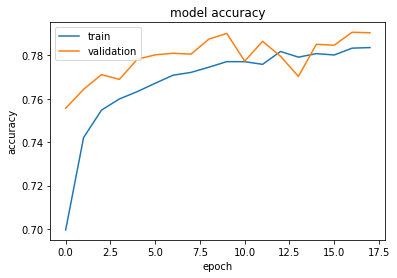

In [9]:
# visualize model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

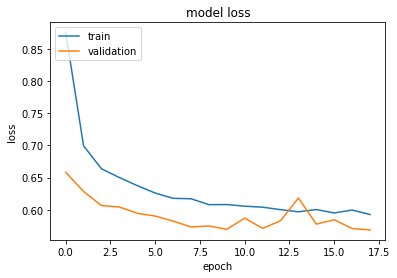

In [10]:
# visualize model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()